In [3]:
import torch
print(torch.cuda.is_available()) # should be True
# t = torch.rand(10, 10).cuda()
# print(t.device) # should be CUDA]
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn.functional as F
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt
import torchio as tio
from typing import List, Tuple
from numpy import ndarray
from nilearn.image import resample_to_img
from sklearn.model_selection import StratifiedKFold

True


In [21]:
mask_pre_nifti = nib.load('../data/raw/preop/BTC-preop/derivatives/tumor_masks/sub-PAT08/anat/sub-PAT08_space_T1_label-tumor.nii')
head_pre_nifti = nib.load('../data/processed/preop/BTC-preop/sub-PAT08/t1_ants_aligned.nii.gz')
mask_post_nifti = nib.load('../data/raw/postop/BTC-postop/derivatives/tumor_masks/sub-PAT08/anat/sub-PAT08_space_T1_label-tumor.nii')
head_post_nifti = nib.load('../data/processed/postop/BTC-postop/sub-PAT08/t1_ants_aligned.nii.gz')

mask_post_resampled = resample_to_img(mask_post_nifti, head_post_nifti, interpolation='nearest')
mask_pre_resampled = resample_to_img(mask_pre_nifti, head_pre_nifti, interpolation='nearest')

head_pre_nifti = head_pre_nifti.get_fdata()
mask_pre_resampled_data = mask_pre_resampled.get_fdata()

head_post_nifti = head_post_nifti.get_fdata()
mask_post_resampled_data = mask_post_resampled.get_fdata()



(160, 221, 186)
(160, 221, 186)


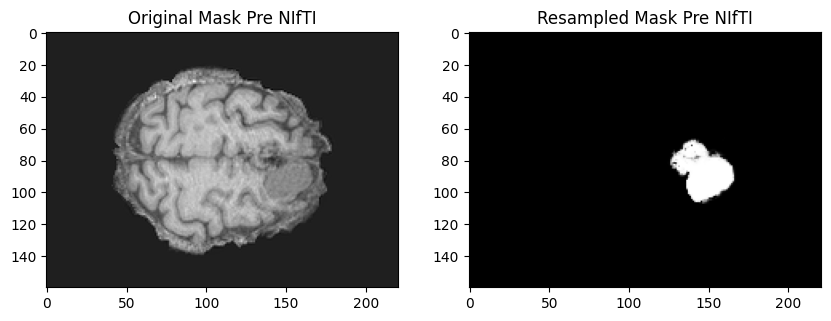

In [27]:
slice_index = 130

# Extract the data from the NIfTI images
print(head_pre_nifti.shape)
print(mask_pre_resampled_data.shape)
# Plot the slices
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Mask Pre NIfTI')
plt.imshow(head_pre_nifti[:, :, slice_index], cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Resampled Mask Pre NIfTI')
plt.imshow(mask_pre_resampled_data[:, :, slice_index], cmap='gray')

plt.show()

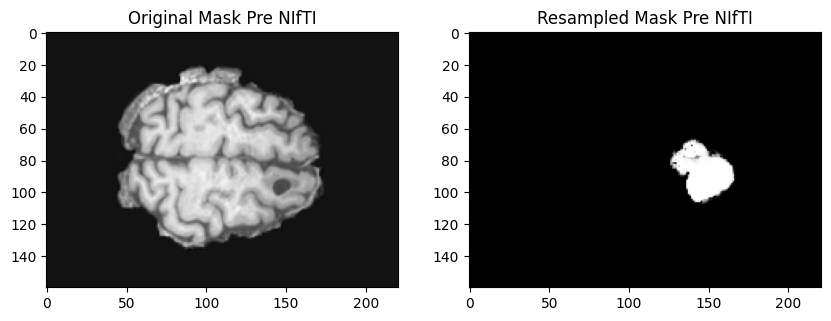

In [28]:

# Plot the slices
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Mask Pre NIfTI')
plt.imshow(head_post_nifti[:, :, slice_index], cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Resampled Mask Pre NIfTI')
plt.imshow(mask_post_resampled_data[:, :, slice_index], cmap='gray')

plt.show()